In [1]:
import h5py
import tables as tb
from psychopy.misc import fromFile
import pandas as pd
import numpy as np
import os
import pickle

pd.set_option('display.expand_frame_repr', False)

In [2]:
DIR_ROOT = ''
DIR_RAW = ""
DIR_PRE = ""
DIR_ORG = ""
FILE = ""

In [3]:
class ValidationTrial:
    def __init__(self, trialNbr, pos):
        self.trialNbr = trialNbr
        self.pos = pos
        self.eyeTracking = None
        
    def __str__(self):
        return f'Validation Trial {self.trialNbr}\n   Position: {self.pos}\n'
        
class EncodingTrial:
    def __init__(self, trialNbr, image, roiX, roiY):
        self.trialNbr = trialNbr
        self.image = image
        self.roiX = roiX
        self.roiY = roiY
        self.eyeTracking = None
        
    def __str__(self):
        return f'Encoding Trial {self.trialNbr}\n   Image: {self.image}\n'

class RecognitionTrial:
    def __init__(self, trialNbr, image, group, answer, roiX, roiY):
        self.trialNbr = trialNbr
        self.image = image
        self.group = group
        self.answer = answer
        self.roiX = roiX
        self.roiY = roiY
        self.eyeTracking = None
    
    def __str__(self):
        return f'Recognition Trial {self.trialNbr}\n   Image: {self.image}\n   Group: {self.group}\n   Answer: {self.answer}\n'

class Participant:
    def __init__(self, participant, group, age, gender, education):
        self.participant = participant
        self.group = group
        self.age = age
        self.gender = gender
        self.education = education
        self.validation = []
        self.encoding = []
        self.recognition = []

    def __str__(self):
        return f'Participant {self.participant}\n   Group: {self.group}\n   Age: {self.age}\n   Gender: {self.gender}\n   Education: {self.education}\n'
    
    def validationShow(self):
        assert self.validation != []
        
        validationList = []
        for trial in self.validation:
            validationList += [[trial.trialNbr, trial.pos[0], trial.pos[1],
                                (trial.eyeTracking['time'].max())/len(trial.eyeTracking),len(trial.eyeTracking)]]
        
        validationList = np.array(validationList)
        
        df = pd.DataFrame(validationList[:,1:],validationList[:,0],columns=['x', 'y', 'Average Sampling Rate', 'Nbr of Samples'])
        df.index.name = 'Trial'
        df['x'] = df['x'].astype(np.int16)
        df['y'] = df['y'].astype(np.int16)
        df['Average Sampling Rate'] = df['Average Sampling Rate'].astype(np.float32)
        df['Nbr of Samples'] = df['Nbr of Samples'].astype(np.int16)

        return df
    
    def encodingShow(self):
        assert self.encoding != []
        
        encodingList = []
        for trial in self.encoding:
            encodingList += [[trial.trialNbr, trial.image,
                              (trial.eyeTracking['time'].max())/len(trial.eyeTracking),len(trial.eyeTracking)]]
        encodingList = np.array(encodingList)
        
        df = pd.DataFrame(encodingList[:,1:],encodingList[:,0],columns=['Image', 'Average Sampling Rate', 'Nbr of Samples'])
        df.index.name = 'Trial'
        df['Image'] = df['Image'].astype('string')
        df['Average Sampling Rate'] = df['Average Sampling Rate'].astype(np.float32)
        df['Nbr of Samples'] = df['Nbr of Samples'].astype(np.int16)

        return df
    
    def recognitionShow(self):
        assert self.recognition != []
        
        recognitionList = []
        for trial in self.recognition:
            recognitionList += [[trial.trialNbr, trial.image, trial.group, trial.answer,
                                 (trial.eyeTracking['time'].max())/len(trial.eyeTracking),len(trial.eyeTracking)]]
        recognitionList = np.array(recognitionList)
        
        df = pd.DataFrame(recognitionList[:,1:],recognitionList[:,0],columns=['Image', 'Group', 'Answer', 'Average Sampling Rate', 'Nbr of Samples'])
        df.index.name = 'Trial'
        df['Image'] = df['Image'].astype('string')
        df['Group'] = df['Group'].astype('string')
        df['Answer'] = df['Answer'].astype('string')
        df['Average Sampling Rate'] = df['Average Sampling Rate'].astype(np.float32)
        df['Nbr of Samples'] = df['Nbr of Samples'].astype(np.int16)

        return df

In [4]:
def headerGetter(file, path=""):
    if len(path) == 0 and isinstance(file, h5py.Group):
        for item in file.keys():
            headerGetter(file, path + "/" + item)
    elif isinstance(file[path], h5py.Group):
        for item in file[path].keys():
            headerGetter(file, path + "/" + item)
        if len(file[path].keys()) == 0:
            print(path, file[path])
    else:
        print(path, file[path])

In [5]:
def bubble_sort(arr):
  
    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):
        
        # Initialize swapped to track if any swaps occur
        swapped = False  

        # Inner loop to compare adjacent elements
        for i in range(n):
            if arr[i].trialNbr > arr[i + 1].trialNbr:
              
                # Swap elements if they are in the wrong order
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                
                # Mark that a swap has occurred
                swapped = True
        
        # If no swaps occurred, the list is already sorted
        if not swapped:
            break

In [6]:
with h5py.File(f"{DIR_RAW}{FILE}.hdf5", "r") as f:
    headerGetter(f)
print()

/class_table_mapping <HDF5 dataset "class_table_mapping": shape (21,), type "|V168">
/data_collection/condition_variables <HDF5 group "/data_collection/condition_variables" (0 members)>
/data_collection/events/experiment/LogEvent <HDF5 dataset "LogEvent": shape (64,), type "|V171">
/data_collection/events/experiment/MessageEvent <HDF5 dataset "MessageEvent": shape (618,), type "|V206">
/data_collection/events/eyetracker/BinocularEyeSampleEvent <HDF5 dataset "BinocularEyeSampleEvent": shape (0,), type "|V183">
/data_collection/events/eyetracker/BlinkEndEvent <HDF5 dataset "BlinkEndEvent": shape (0,), type "|V48">
/data_collection/events/eyetracker/BlinkStartEvent <HDF5 dataset "BlinkStartEvent": shape (0,), type "|V44">
/data_collection/events/eyetracker/FixationEndEvent <HDF5 dataset "FixationEndEvent": shape (15984,), type "|V234">
/data_collection/events/eyetracker/FixationStartEvent <HDF5 dataset "FixationStartEvent": shape (15986,), type "|V102">
/data_collection/events/eyetracker/

In [7]:
with tb.open_file(f"{DIR_RAW}{FILE}.hdf5", "r") as f:
    table = f.root.data_collection.experiment_meta_data
    experiment_metadata = pd.DataFrame.from_records(table.read())
    print(experiment_metadata)
    print()
    
    table = f.root.data_collection.session_meta_data
    session_metadata = pd.DataFrame.from_records(table.read())
    print(session_metadata)
    print()

   experiment_id     code title description version
0              1  b'exp2'   b''         b''     b''

   session_id  experiment_id  code name comments user_variables
0           1              1  b'1'  b''      b''          b'{}'



In [8]:
with tb.open_file(f"{DIR_RAW}{FILE}.hdf5", "r") as f:
    table = f.root.data_collection.events.experiment.MessageEvent
    message_event = pd.DataFrame.from_records(table.read())
    print(message_event['text'].unique())

[b'ENC_TRIAL_START' b'ENC_TRIAL_END' b'REC_TRIAL_START' b'REC_TRIAL_END'
 b'VAL_TRIAL_START' b'VAL_TRIAL_END']


In [9]:
psydata = fromFile(f"{DIR_RAW}{FILE}.psydat")
for entry in psydata.entries:
    print(entry)

{'intro_text.started': 197.51060569984838, 'intro_resp.started': 197.51060569984838, 'intro_resp.keys': 'space', 'intro_resp.rt': 105.05044590029866, 'participant': '6', 'rand_list': '2', 'age': '82', 'gender': 'female', 'education': '17', 'group': 'control', 'date': '2024-03-12_12h13.08.644', 'expName': 'exp2', 'psychopyVersion': '2022.2.5', 'frameRate': 59.93123486588747}
{'enc_instr1_text.started': 359.2325519998558, 'enc_instr1_resp.started': 359.2325519998558, 'enc_instr1_resp.keys': 'space', 'enc_instr1_resp.rt': 9.777692600153387, 'participant': '6', 'rand_list': '2', 'age': '82', 'gender': 'female', 'education': '17', 'group': 'control', 'date': '2024-03-12_12h13.08.644', 'expName': 'exp2', 'psychopyVersion': '2022.2.5', 'frameRate': 59.93123486588747}
{'fix_img.started': 369.05573589960113, 'enc_etRecord.started': 369.3894913997501, 'enc_etRecord.stopped': 369.3894913997501, 'enc_roi.started': 369.3894913997501, 'enc_img.started': 369.3894913997501, 'enc_roi.numLooks': 2, 'enc

# Organize

In [10]:
participants = []
hashTable = []
for mindir in ['control/', 'patient/']:
    for file in os.listdir(f'{DIR_RAW}ours/{mindir}'):
        if file[-5:]=='.hdf5':
            psydata = fromFile(f"{DIR_RAW}ours/{mindir}{file[:-5]}.psydat")
            entry = psydata.entries[0]
            
            number = int(entry.get('participant'))
            
            if number == 3 and entry.get('group') == 'control':
                number = 4
            elif number == 17 and '2024-07-09' in file[:-5]:
                number = 19
            
            participant = Participant(number, entry.get('group'), entry.get('age'), entry.get('gender'), entry.get('education'))
            for entry in psydata.entries:
                if 'enc_etRecord.started' in entry.keys():
                    if 'enc_loop2_block2.thisTrialN' in entry.keys():
                        trialN = int(entry['enc_loop2_block2.thisTrialN']) + 75
                    elif 'enc_loop2_block1.thisTrialN' in entry.keys():
                        trialN = int(entry['enc_loop2_block1.thisTrialN']) + 50
                    elif 'enc_loop1_block1.thisTrialN' in entry.keys():
                        trialN = int(entry['enc_loop1_block1.thisTrialN'])
                    else:
                        trialN = int(entry['enc_loop1_block2.thisTrialN']) + 25

                    participant.encoding+=[EncodingTrial(trialN,entry['img_name'], (-400,400), (-400,400))]
                    
                elif 'rec_etRecord.started' in entry.keys():
                    if 'rec_loop2_block2.thisTrialN' in entry.keys():
                        trialN = int(entry['rec_loop2_block2.thisTrialN']) + 150
                    elif 'rec_loop2_block1.thisTrialN' in entry.keys():
                        trialN = int(entry['rec_loop2_block1.thisTrialN']) + 100
                    elif 'rec_loop1_block1.thisTrialN' in entry.keys():
                        trialN = int(entry['rec_loop1_block1.thisTrialN'])
                    else:
                        trialN = int(entry['rec_loop1_block2.thisTrialN']) + 50
                        
                    participant.recognition+=[RecognitionTrial(trialN, entry['img_name'],entry['img_group'], 'foil' if entry['rec_resp.keys']=='left' else 'target', (-400,400), (-400,400))]
                    
                elif 'val_etRecord.started' in entry.keys():
                    if entry.get('val_trials.thisN') is not None:
                        n = int(entry['val_trials.thisN'])
                    elif entry.get('val1_trials.thisTrialN') is not None:
                        n = int(entry['val1_trials.thisTrialN'])
                    elif entry.get('val2_trials.thisTrialN') is not None:
                        n = int(entry['val2_trials.thisTrialN'])+9
                    participant.validation+=[ValidationTrial(n,entry['position'])]
            participants += [participant]
            hashTable += [f'{DIR_RAW}ours/{mindir}{file}']

In [11]:
for j, path in enumerate(hashTable):
    with tb.open_file(path, "r") as f:
        table = f.root.data_collection.events.eyetracker.GazepointSampleEvent
        gaze_points = pd.DataFrame.from_records(table.read())

        COLUMNS = [
            "time",
            "left_gaze_x",
            "left_gaze_y",
            "left_pupil_measure1",
            "right_gaze_x",
            "right_gaze_y",
            "right_pupil_measure1",
            "status",
        ]

        table = f.root.data_collection.events.experiment.MessageEvent
        events = pd.DataFrame.from_records(table.read())
        
        valInd = 0
        encInd = 0
        recInd = 0
        
        for i in range(len(events)//2):
            trial = gaze_points[COLUMNS][(gaze_points["time"] > events["time"][i * 2]) & (gaze_points["time"] < events["time"][i * 2 + 1])]
            trial = trial.reset_index(drop=True)
            trial['time'] = trial['time']- trial['time'][0]
            trial['status'] = trial['status'].astype(np.int8)
            
            match events["text"][i * 2]:
                case b'ENC_TRIAL_START' : 
                    participants[j].encoding[encInd].eyeTracking = trial
                    encInd+=1
                case b'VAL_TRIAL_START' :
                    participants[j].validation[valInd].eyeTracking = trial
                    valInd+=1
                case b'REC_TRIAL_START' :
                    participants[j].recognition[recInd].eyeTracking = trial
                    recInd+=1

In [12]:
hashTable = {}

for mindir in ['control/', 'patient/']:
    for file in os.listdir(f'{DIR_RAW}coco/{mindir}'):
        if file[-4:]=='.csv':
            participantHash = len(participants)
            with open(f'{DIR_RAW}coco/{mindir}{file}', "r") as f:
                for i, l in enumerate(f):
                    if i == 0:
                        header = l.replace('"', "").split(",")

                        age_ind = header.index("age")
                        education_ind = header.index("education")
                        gender_ind = header.index("sex")
                        group_ind = header.index("pdata")
                        subject_ind = header.index("subject_nr")
                        
                        trial_ind = header.index("count_logger")
                        task_ind = header.index("task")

                        correct_ind = header.index("correct_response")
                        answer_ind = header.index("response_recall_image")

                        imageR_ind = header.index("image_right")
                        imageL_ind = header.index("image_left")

                        imageLType_ind = header.index("memory_left")

                        nlist_ind = header.index("nlist")
                    else:
                        line = l.replace('"', "").split(",")
                        if i == 1:
                            participantGroup = line[group_ind]
                            participantNbr = 100 + int(line[subject_ind]) if participantGroup == 'control' else 200 + int(line[subject_ind])
                            gender = 'female' if line[gender_ind] == 'F' else 'male'
                            if f'{participantNbr}_{participantGroup}' not in hashTable.keys():
                                participant = Participant(participantNbr,participantGroup,int(line[age_ind]),gender,line[education_ind])
                                hashTable[f'{participantNbr}_{participantGroup}'] = [participantHash,[f'{DIR_RAW}coco/{mindir}{file[:-3]}tsv']]
                                participants += [participant]
                            else:
                                participantHash = hashTable[f'{participantNbr}_{participantGroup}'][0]
                                if file.count("_") > 1:
                                    hashTable[f'{participantNbr}_{participantGroup}'][1] += [f'{DIR_RAW}coco/{mindir}{file[:-3]}tsv']
                                else:
                                    hashTable[f'{participantNbr}_{participantGroup}'][1] = [f'{DIR_RAW}coco/{mindir}{file[:-3]}tsv'] + hashTable[f'{participantNbr}_{participantGroup}'][1]
                                    
                            if file.count("_") > 1:
                                shift = 129
                            else:
                                shift = 0
                        
                        if line[task_ind] == 'E':
                            trialN = int(line[trial_ind]) + shift

                            participants[participantHash].encoding += [EncodingTrial(trialN, line[imageL_ind], (-350,350), (-350, 350))]
                            
                        else:
                            trialN = int(line[trial_ind]) - 129 + shift
                            
                            participants[participantHash].recognition += [RecognitionTrial(trialN, [line[imageL_ind],line[imageR_ind]], line[correct_ind], line[answer_ind], (-700,700), (-280,280))]
                            
                bubble_sort(participants[participantHash].recognition)
                bubble_sort(participants[participantHash].encoding)

In [13]:
for i, files in hashTable.values():
    for n, file in enumerate(files):
        with open(file,'r') as f:
            start = False
            j=-1
            for line in f:
                if 'start_trial' in line:
                    start = True
                    j+=1
                    trialData = []
                elif 'end of' in line:
                    trialData = np.array(trialData, dtype = np.float64)
                    
                    trialData[:,[1,4]] -= 800
                    trialData[:,[2,5]] -= 450
                    trialData[:,0] -= trialData[0,0]
                    trialData[:,0] = trialData[:,0]/1000
                    
                    trialData = trialData.astype(np.float32)
                    
                    start = False
                    
                    if j < 129:
                        participants[i].encoding[j + n*129].eyeTracking = pd.DataFrame(trialData[:3*30],columns=COLUMNS)
                        participants[i].encoding[j + n*129].eyeTracking['time'] -= participants[i].encoding[j + n*129].eyeTracking['time'][0]
                    else:
                        participants[i].recognition[j - 129 + n*129].eyeTracking = pd.DataFrame(trialData,columns=COLUMNS)
                        participants[i].recognition[j - 129 + n*129].eyeTracking['time'] -= participants[i].recognition[j - 129 + n*129].eyeTracking['time'][0]
                        
                    
                elif start:
                    line = line.split('\t')
                    
                    avg = line[6:9]
                    Lavg = line[11:14]
                    Ravg = line[18:21]
                    if eval(Lavg[-1]) == 0:
                        Lavg[0] = str(2*eval(avg[0]) - eval(Ravg[0]))
                        Lavg[1] = str(2*eval(avg[1]) - eval(Ravg[1]))
                        Lavg[2] = str(2*eval(avg[2]) - eval(Ravg[2]))
                    elif eval(Ravg[-1]) == 0:
                        Ravg[0] = str(2*eval(avg[0]) - eval(Lavg[0]))
                        Ravg[1] = str(2*eval(avg[1]) - eval(Lavg[1]))
                        Ravg[2] = str(2*eval(avg[2]) - eval(Lavg[2]))
                    
                    trialData += [[line[1]] + Lavg + Ravg + [line [3] if line[3]!='7' else '0']]
            
            
                    

# Pre-Processing

In [14]:
print(participants[-2])
print(participants[-2].encoding[-1])
participants[-2].encoding[4].eyeTracking

Participant 233
   Group: patient
   Age: 76
   Gender: male
   Education: 13

Encoding Trial 257
   Image: sun_bicdzvxyqgzkajla.jpg



,time,left_gaze_x,left_gaze_y,left_pupil_measure1,right_gaze_x,right_gaze_y,right_pupil_measure1,status
0,0.000,-26.635300,-64.260498,19.705500,242.241898,33.121899,30.313700,0.0
1,0.033,-25.640400,-64.334000,20.652399,237.543793,20.142401,30.667900,0.0
2,0.066,-28.647301,-67.167999,19.823700,97.711502,-24.743200,19.823700,0.0
3,0.099,-30.567101,-64.757301,20.599199,55.832699,-39.813702,20.599199,0.0
4,0.132,-31.570601,-67.136703,19.587299,171.891495,35.237301,24.486900,0.0
...,...,...,...,...,...,...,...,...
85,2.830,140.283005,-92.882202,18.963100,298.673798,-55.755001,18.963100,0.0
86,2.864,134.380600,-94.748100,18.570200,488.604614,79.563599,37.116501,0.0
87,2.897,131.724503,-96.117599,18.541000,131.724503,-96.117599,18.541000,0.0
88,2.930,134.132996,-97.540604,18.233500,486.509186,80.853600,33.227798,0.0


In [15]:
participants[0].encoding[4].eyeTracking

,time,left_gaze_x,left_gaze_y,left_pupil_measure1,right_gaze_x,right_gaze_y,right_pupil_measure1,status
0,0.000000,-32.236801,-66.344398,13.60040,15.302400,8.2080,13.54441,0
1,0.007031,-32.467201,-61.290001,13.48424,15.955200,13.3272,13.54468,0
2,0.013386,-46.175999,-33.058800,13.48424,2.880000,-1.1340,13.44185,0
3,0.020077,-44.908798,-48.286800,13.30797,-26.054399,1.7928,13.62402,0
4,0.026775,-44.908798,-48.286800,13.38515,-26.054399,1.7928,13.50318,0
...,...,...,...,...,...,...,...,...
369,2.471617,-49.728001,-18.154800,13.24074,-10.176000,-1.1664,13.36385,0
370,2.478554,-49.728001,-18.154800,13.31291,-10.176000,-1.1664,13.32402,0
371,2.485482,-37.670399,22.625999,13.00827,2.572800,-12.7440,13.23311,0
372,2.492123,-37.267200,0.572400,13.07884,9.907200,12.5388,13.28507,0


In [16]:
for participant in participants:
    length = int(150*2.5) if participant.participant<100 else 30*3
    for i in range(len(participant.encoding)):
        if len(participant.encoding[i].eyeTracking) > length:
            participant.encoding[i].eyeTracking = participant.encoding[i].eyeTracking.iloc[:length]
        else:
            while len(participant.encoding[i].eyeTracking) < length:
                participant.encoding[i].eyeTracking.loc[len(participant.encoding[i].eyeTracking)] = {key:0.0 if key!='status' else -1 for key in participant.encoding[i].eyeTracking.columns}

In [17]:
participants[0].encodingShow()

,Image,Average Sampling Rate,Nbr of Samples
Trial,,,
0,sun_bqdxonzxhumbqrje.jpg,0.006723,375
1,sun_bzvoknllbeevguuk.jpg,0.006662,375
2,sun_bxbejpebjajnyjov.jpg,0.006662,375
3,sun_bldhampwjigjgotl.jpg,0.006655,375
4,sun_bvudckyvlhzzsiaq.jpg,0.006662,375
...,...,...,...
95,sun_avuqfmqnnacpugwc.jpg,0.006648,375
96,sun_aflsnycseiotupac.jpg,0.006645,375
97,sun_aafoawnznbtggclj.jpg,0.006662,375


In [18]:
print(participants[-1])
participants[-1].encodingShow()

Participant 210
   Group: patient
   Age: 55
   Gender: male
   Education: 8



,Image,Average Sampling Rate,Nbr of Samples
Trial,,,
129,sun_aalvqktbjyylcjbk.jpg,0.032922,90
130,sun_bgyehazlnlqldiyq.jpg,0.032933,90
131,sun_ajauukopxrvrqgbl.jpg,0.032922,90
132,sun_blhowcldxdlmmmik.jpg,0.032933,90
133,sun_alufucueluzcbpos.jpg,0.032922,90
...,...,...,...
253,sun_abujabnrsfclfegg.jpg,0.032933,90
254,sun_abtvuklfnprhdzdu.jpg,0.032922,90
255,sun_ahkyzprgheiigcbi.jpg,0.032933,90


## Remove Bad Data
Detect data outside of ROI

In [19]:
for participant in participants:
    for i in range(len(participant.encoding)):
        indexesX = ((participant.encoding[i].eyeTracking["right_gaze_x"]+participant.encoding[i].eyeTracking["left_gaze_x"])/2 >= participant.encoding[i].roiX[0]) & ((participant.encoding[i].eyeTracking["right_gaze_x"]+participant.encoding[i].eyeTracking["left_gaze_x"])/2  <= participant.encoding[i].roiX[1])
        
        indexesY = ((participant.encoding[i].eyeTracking["right_gaze_y"] + participant.encoding[i].eyeTracking["left_gaze_y"])/2 >= participant.encoding[i].roiY[0]) & ((participant.encoding[i].eyeTracking["right_gaze_y"] + participant.encoding[i].eyeTracking["left_gaze_y"])/2 <= participant.encoding[i].roiY[1])
        
        indexesStatus = participant.encoding[i].eyeTracking["status"] == 0.0
        indexes = ~(indexesX & indexesY) & indexesStatus
        participant.encoding[i].eyeTracking.loc[indexes,'status'] = -2

In [20]:
for participant in participants:
    with open(f'{DIR_ORG}{participant.participant}_{participant.group}.pkl', "wb") as f:
        pickle.dump(participant,f)

Remove Blinks and other missing data, and points outside of ROI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

pd.set_option('display.expand_frame_repr', False)
DIR_ROOT = ''
DIR_RAW = ""
DIR_PRE = ""
DIR_ORG = ""

COLUMNS = [
            "time",
            "left_gaze_x",
            "left_gaze_y",
            "left_pupil_measure1",
            "right_gaze_x",
            "right_gaze_y",
            "right_pupil_measure1",
            "status",
        ]

class ValidationTrial:
    def __init__(self, trialNbr, pos):
        self.trialNbr = trialNbr
        self.pos = pos
        self.eyeTracking = None
        
    def __str__(self):
        return f'Validation Trial {self.trialNbr}\n   Position: {self.pos}\n'
        
class EncodingTrial:
    def __init__(self, trialNbr, image, roiX, roiY):
        self.trialNbr = trialNbr
        self.image = image
        self.roiX = roiX
        self.roiY = roiY
        self.eyeTracking = None
        
    def __str__(self):
        return f'Encoding Trial {self.trialNbr}\n   Image: {self.image}\n'

class RecognitionTrial:
    def __init__(self, trialNbr, image, group, answer, roiX, roiY):
        self.trialNbr = trialNbr
        self.image = image
        self.group = group
        self.answer = answer
        self.roiX = roiX
        self.roiY = roiY
        self.eyeTracking = None
    
    def __str__(self):
        return f'Recognition Trial {self.trialNbr}\n   Image: {self.image}\n   Group: {self.group}\n   Answer: {self.answer}\n'

class Participant:
    def __init__(self, participant, group, age, gender, education):
        self.participant = participant
        self.group = group
        self.age = age
        self.gender = gender
        self.education = education
        self.validation = []
        self.encoding = []
        self.recognition = []

    def __str__(self):
        return f'Participant {self.participant}\n   Group: {self.group}\n   Age: {self.age}\n   Gender: {self.gender}\n   Education: {self.education}\n'
    
    def validationShow(self):
        assert self.validation != []
        
        validationList = []
        for trial in self.validation:
            validationList += [[trial.trialNbr, trial.pos[0], trial.pos[1],
                                (trial.eyeTracking['time'].max())/len(trial.eyeTracking),len(trial.eyeTracking)]]
        
        validationList = np.array(validationList)
        
        df = pd.DataFrame(validationList[:,1:],validationList[:,0],columns=['x', 'y', 'Average Sampling Rate', 'Nbr of Samples'])
        df.index.name = 'Trial'
        df['x'] = df['x'].astype(np.int16)
        df['y'] = df['y'].astype(np.int16)
        df['Average Sampling Rate'] = df['Average Sampling Rate'].astype(np.float32)
        df['Nbr of Samples'] = df['Nbr of Samples'].astype(np.int16)

        return df
    
    def encodingShow(self):
        assert self.encoding != []
        
        encodingList = []
        for trial in self.encoding:
            encodingList += [[trial.trialNbr, trial.image,
                              (trial.eyeTracking['time'].max())/len(trial.eyeTracking),len(trial.eyeTracking)]]
        encodingList = np.array(encodingList)
        
        df = pd.DataFrame(encodingList[:,1:],encodingList[:,0],columns=['Image', 'Average Sampling Rate', 'Nbr of Samples'])
        df.index.name = 'Trial'
        df['Image'] = df['Image'].astype('string')
        df['Average Sampling Rate'] = df['Average Sampling Rate'].astype(np.float32)
        df['Nbr of Samples'] = df['Nbr of Samples'].astype(np.int16)

        return df
    
    def recognitionShow(self):
        assert self.recognition != []
        
        recognitionList = []
        for trial in self.recognition:
            recognitionList += [[trial.trialNbr, trial.image, trial.group, trial.answer,
                                 (trial.eyeTracking['time'].max())/len(trial.eyeTracking),len(trial.eyeTracking)]]
        recognitionList = np.array(recognitionList)
        
        df = pd.DataFrame(recognitionList[:,1:],recognitionList[:,0],columns=['Image', 'Group', 'Answer', 'Average Sampling Rate', 'Nbr of Samples'])
        df.index.name = 'Trial'
        df['Image'] = df['Image'].astype('string')
        df['Group'] = df['Group'].astype('string')
        df['Answer'] = df['Answer'].astype('string')
        df['Average Sampling Rate'] = df['Average Sampling Rate'].astype(np.float32)
        df['Nbr of Samples'] = df['Nbr of Samples'].astype(np.int16)

        return df

In [2]:
participants = []
for file in os.listdir(f'{DIR_ORG}'):
    with open(f'{DIR_ORG}{file}', "rb+") as f:
        participants+=[pickle.load(f)]

In [3]:
totalRemoved = 0
totalTrials = 0
for participant in participants:
    removed = 0
    for i in range(len(participant.encoding)):
        indexes = participant.encoding[i].eyeTracking["status"] != 0.0
        for col in COLUMNS[1:-1]:
            participant.encoding[i].eyeTracking.loc[indexes,col] = np.nan
        missingPercent = np.sum(indexes)/len(indexes)*100
        
        if i<129:
            if missingPercent > 25:
                removed+=1
        else:
            if i == 129:
                removed = [removed,0]
            if missingPercent > 25:
                removed[1]+=1
            
    if len(participant.encoding) <= 129:
        if removed > len(participant.encoding)*0.8:
            print(participant.participant, removed)
    else:
        if removed[0] > 129*0.8:
            print(participant.participant, 0, removed[0])
        if removed[1] > 129*0.8:
            print(participant.participant, 1, removed[1])
            
            
    if participant.participant > 100:
        totalRemoved+=np.sum(removed)
        totalTrials += len(participant.encoding)

    for i in range(len(participant.validation)):
        indexes = participant.validation[i].eyeTracking["status"] != 0.0
        for col in COLUMNS[1:-1]:
            participant.validation[i].eyeTracking.loc[indexes,col] = np.nan
            
    for i in range(len(participant.recognition)):
        indexes = participant.recognition[i].eyeTracking["status"] != 0.0
        for col in COLUMNS[1:-1]:
            participant.recognition[i].eyeTracking.loc[indexes,col] = np.nan

5 100
132 0 129
6 100
129 1 129
7 81
219 0 125
10 94
254 0 127


In [4]:
totalRemoved, totalTrials, totalTrials-totalRemoved

(2185, 10191, 8006)

/tmp/ipykernel_28272/2385874149.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


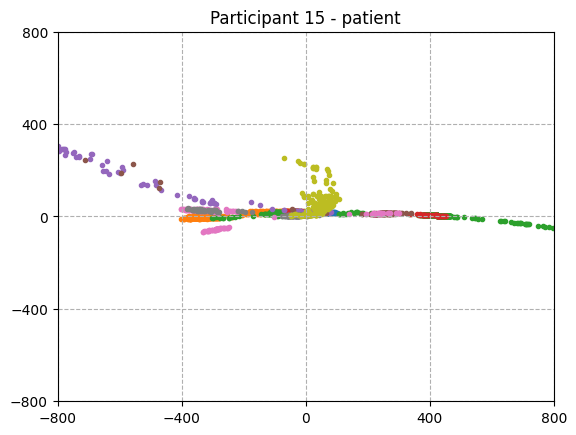

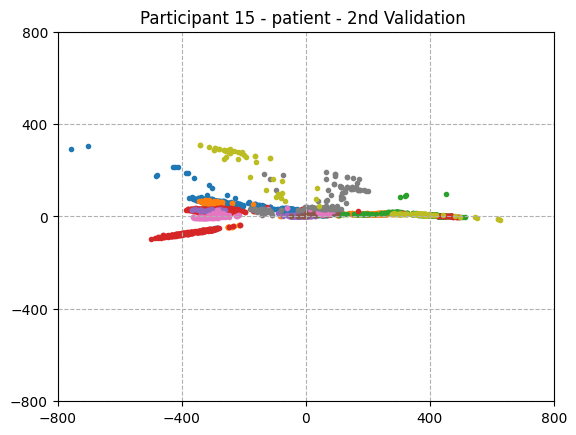

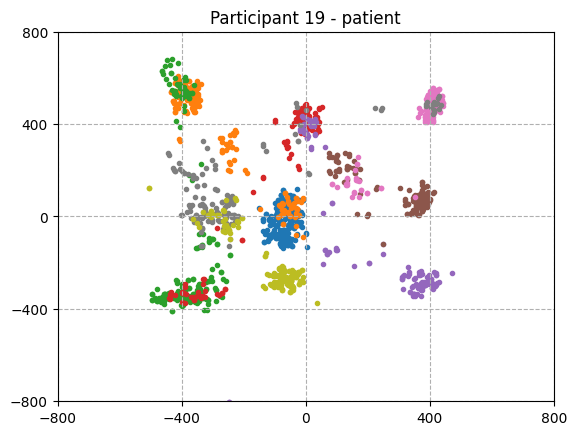

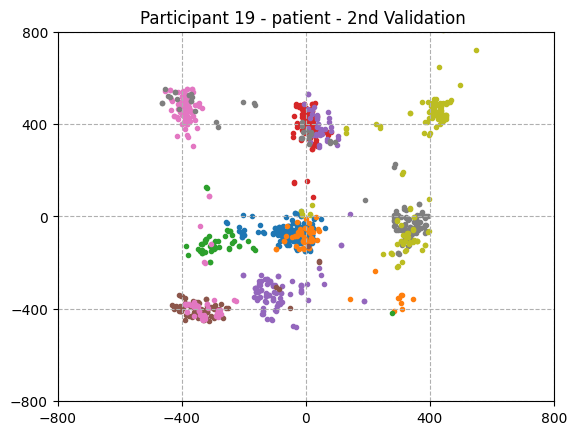

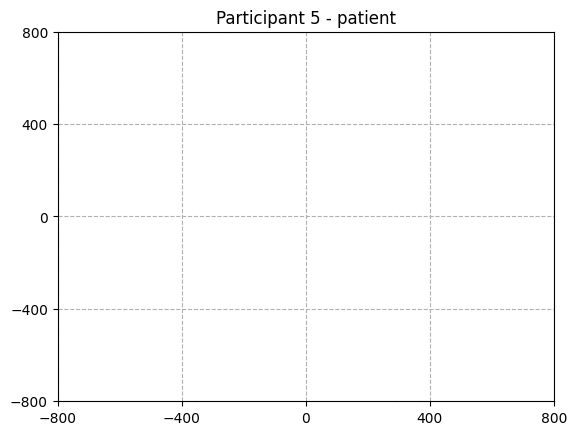

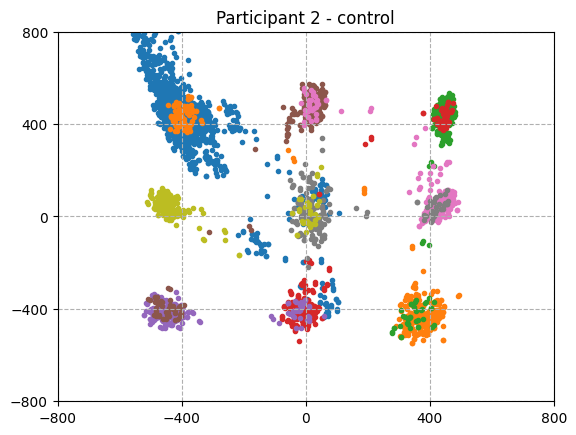

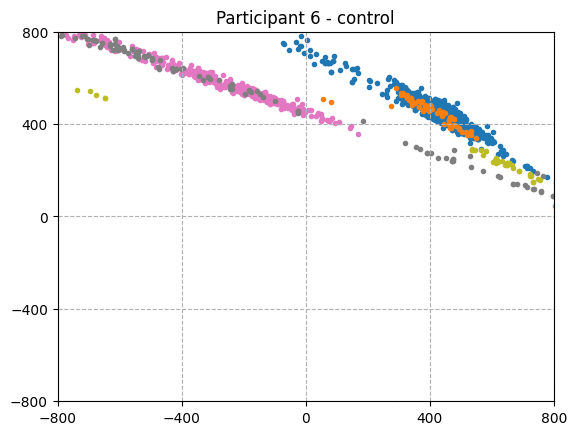

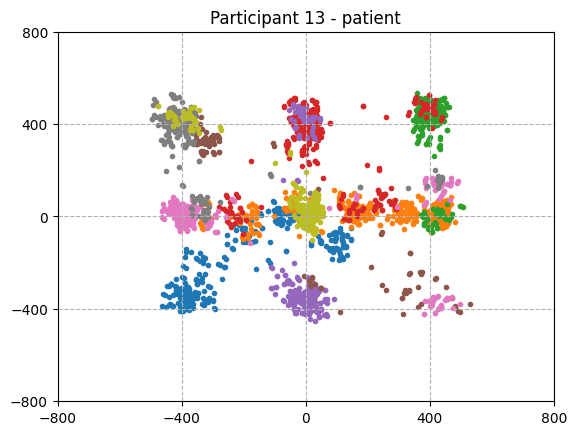

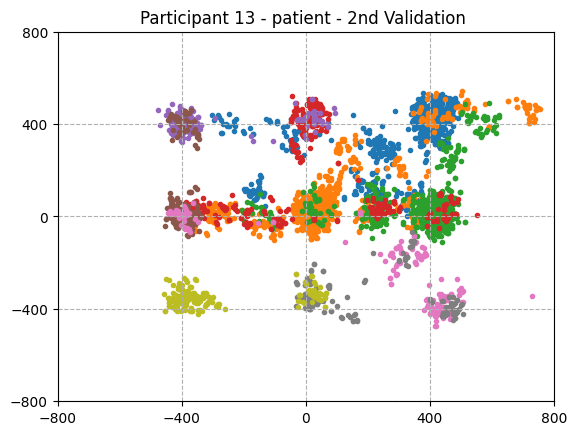

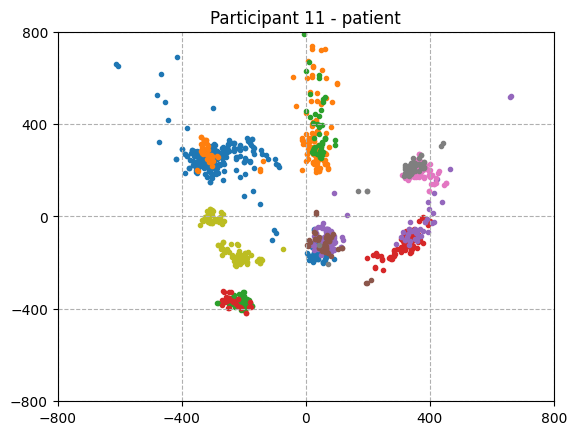

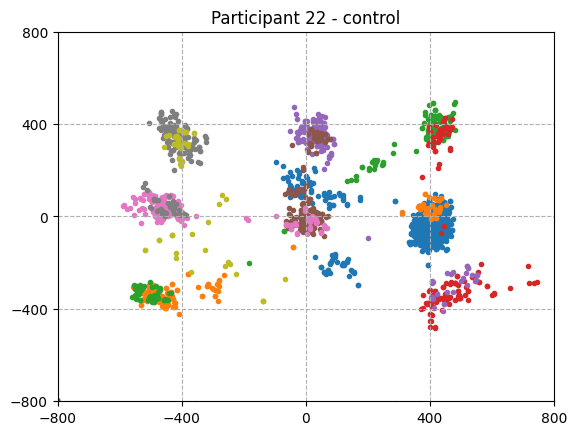

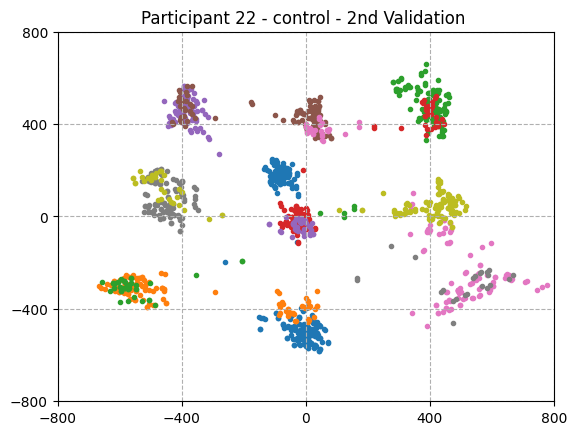

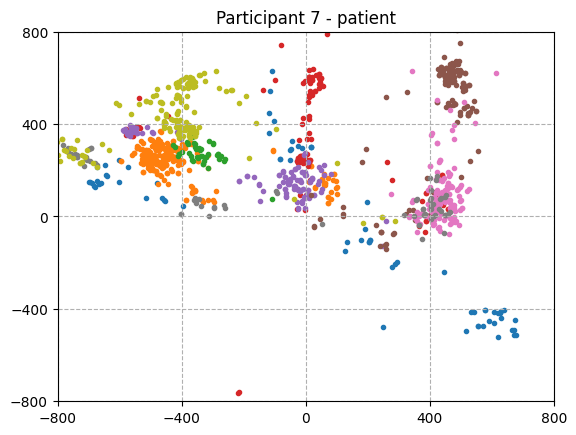

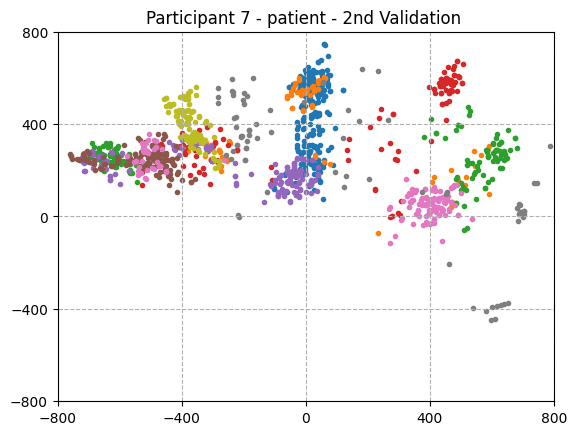

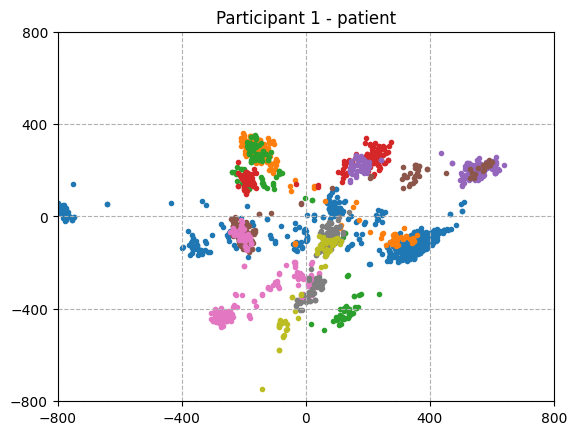

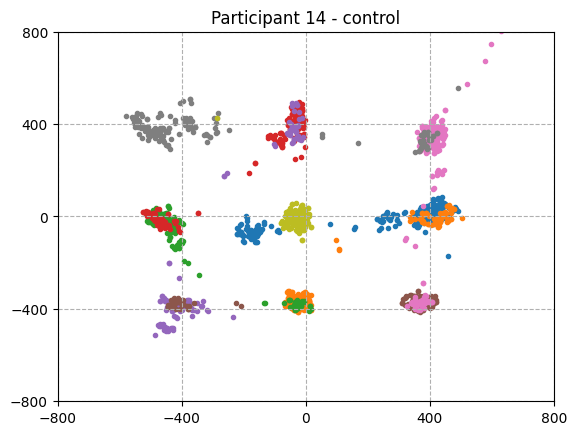

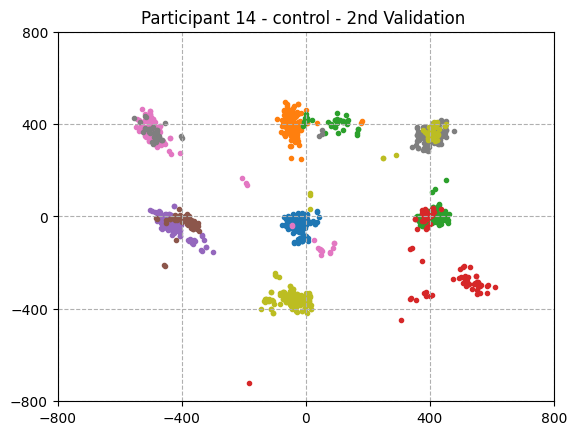

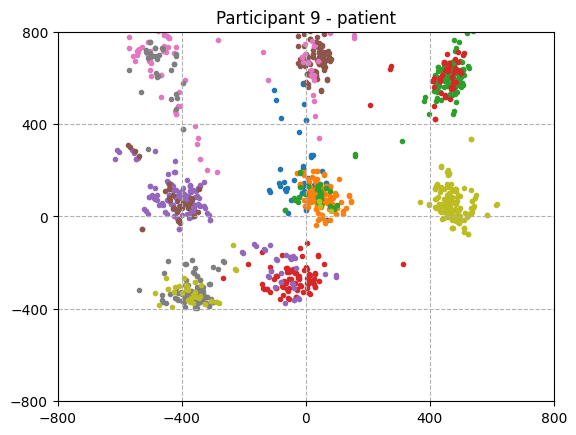

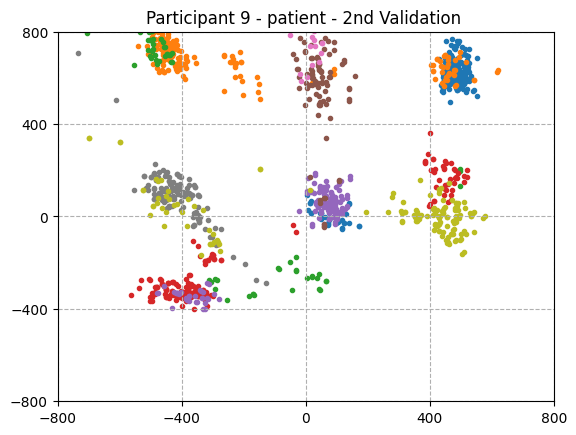

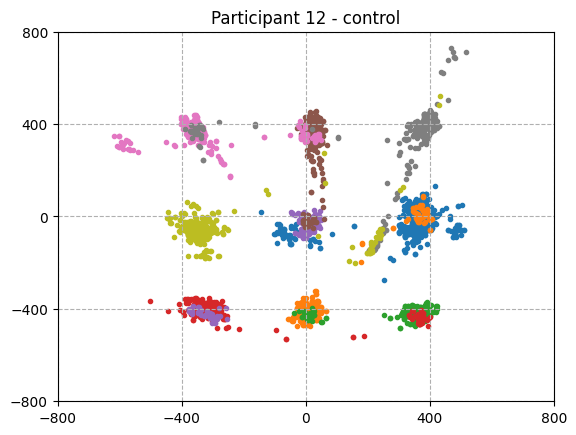

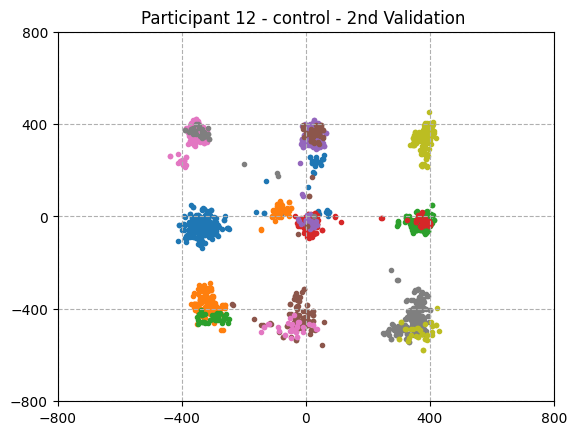

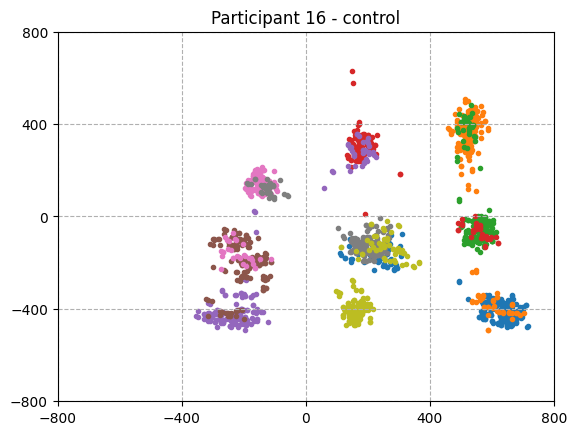

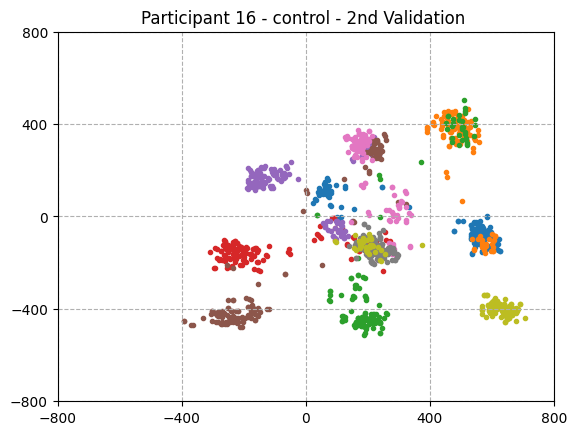

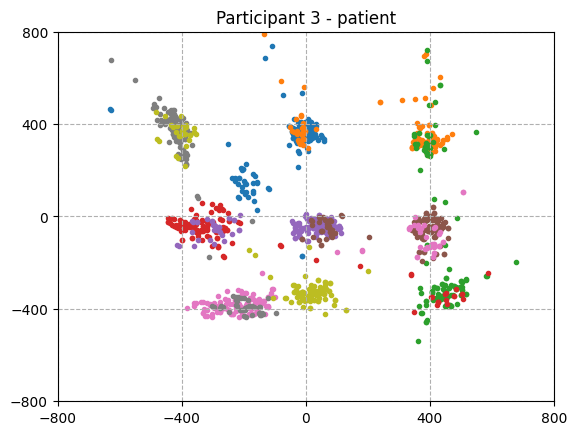

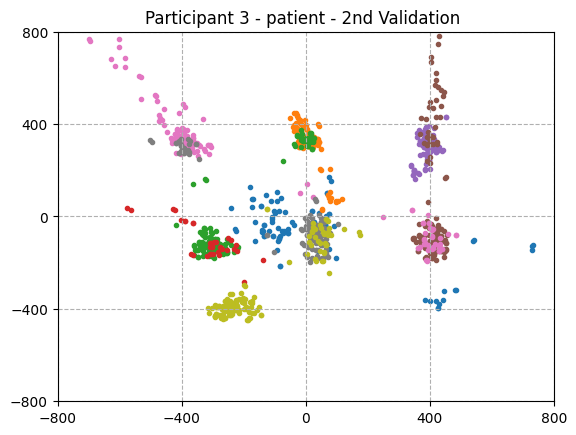

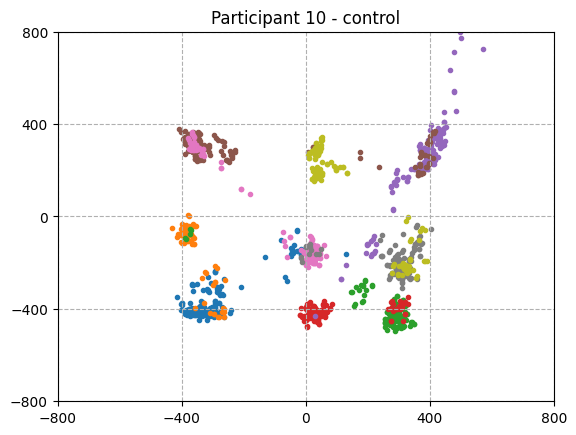

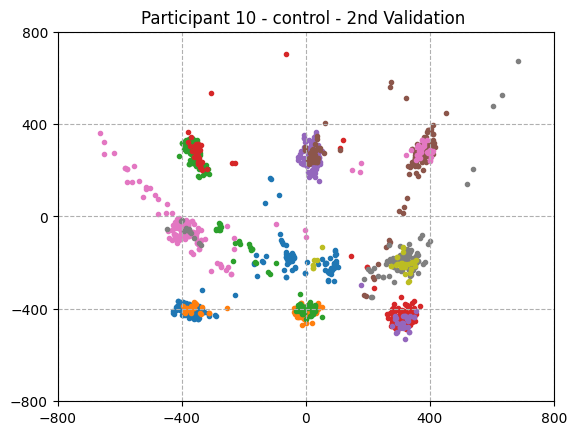

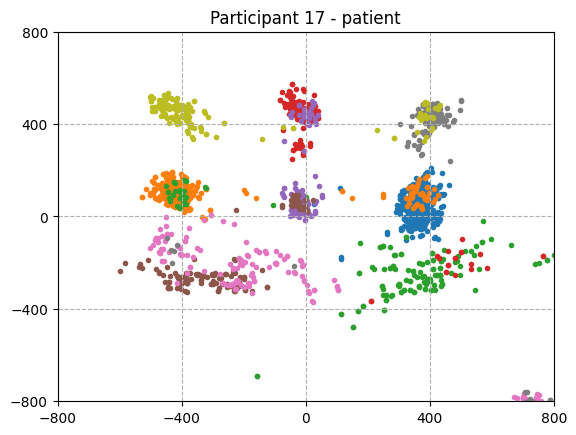

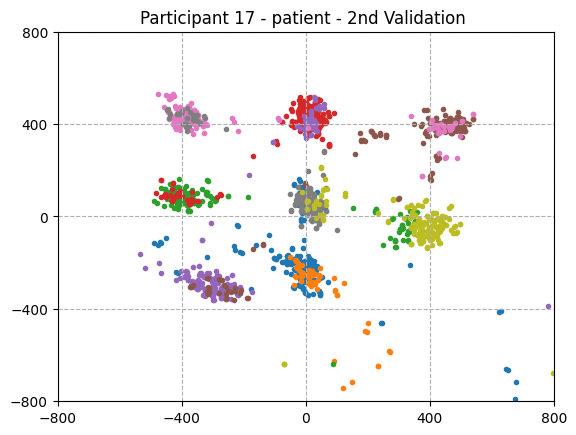

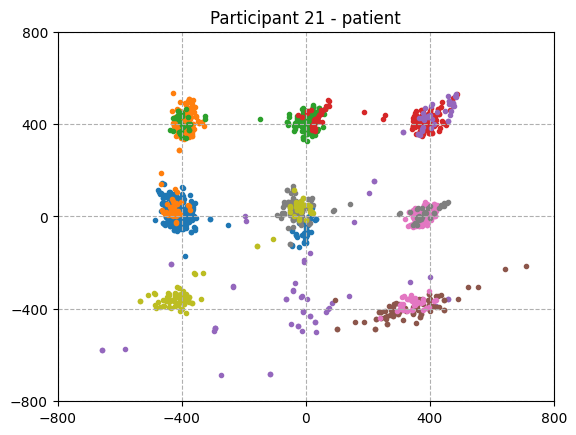

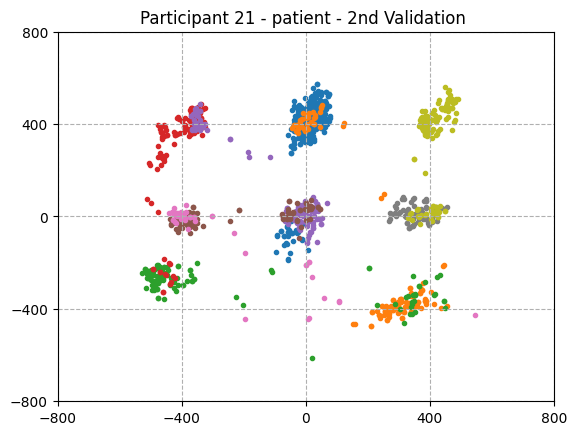

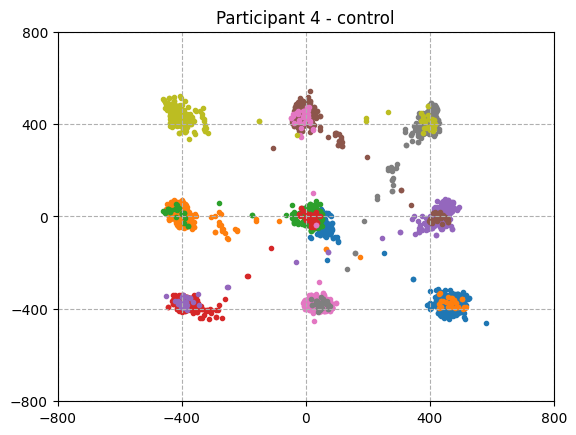

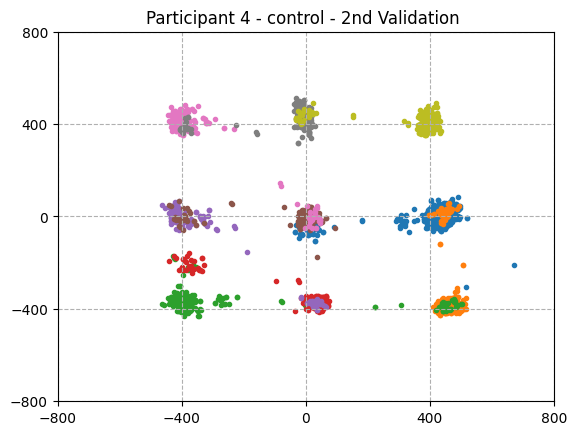

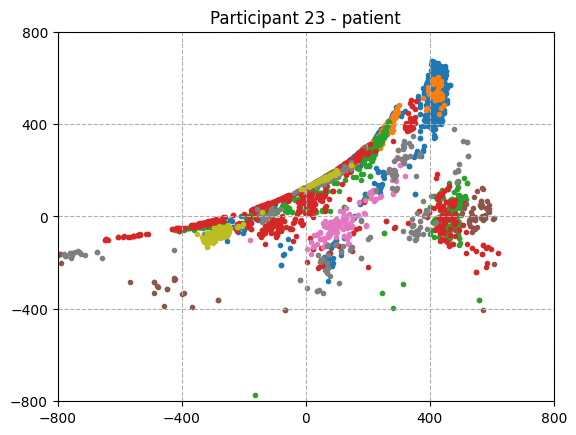

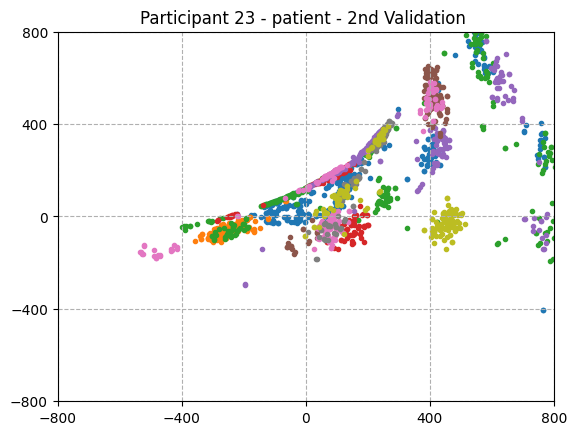

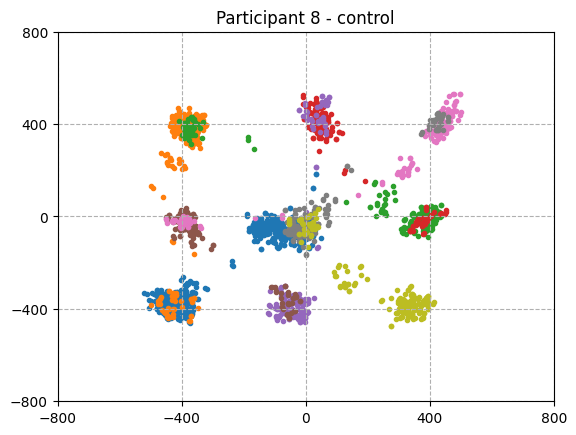

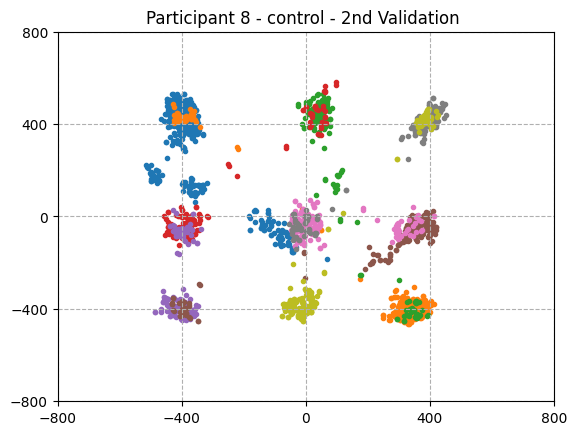

In [5]:
window = 0
for participant in participants:
    if participant.validation:
        plt.figure()
        plt.title(f'Participant {participant.participant} - {participant.group}')
        plt.xlim((-800,800))
        plt.ylim((-800,800))
        plt.grid(axis='both', linestyle = '--')
        plt.xticks([-800, -400, 0, 400, 800])
        plt.yticks([-800, -400, 0, 400, 800])
        
        section = 1
        
        for val in participant.validation:
            if val.trialNbr== 9:
                plt.savefig(f'{DIR_ROOT}val_plots/{participant.participant:02}_val_{section}')
                plt.figure()
                plt.title(f'Participant {participant.participant} - {participant.group} - 2nd Validation ')
                plt.xlim((-800,800))
                plt.ylim((-800,800))
                plt.grid(axis='both', linestyle = '--')
                plt.xticks([-800, -400, 0, 400, 800])
                plt.yticks([-800, -400, 0, 400, 800])
                section = 2
                
                
            plt.scatter(val.eyeTracking['left_gaze_x'][-window:],val.eyeTracking['left_gaze_y'][-window:], marker='.')

        plt.savefig(f'{DIR_ROOT}val_plots/{participant.participant:02}_val_{section}')

Good participants:

- HCs: 2, 4, 8, 12, 14, 16, 22;
- MCI: 1, 3, 11, 13, 17, 19, 21;

Bad Participants : 
- HCs : 6, 10, 129.5, 132;
- MCI: 5, 7, 9, 15, 23, 219, 254;

In [6]:
bad_participants_ours = [6, 10, 5, 7, 9, 15, 23]
bad_participants_coco = {129 : 1, 132: 0, 219:0, 254:0}
for i in range(len(participants)-1, -1, -1):
    if participants[i].participant in bad_participants_ours:
        participants.pop(i)
    else:
        if participants[i].participant in bad_participants_coco.keys():
            if len(participants[i].encoding) == 129:
                participants.pop(i)
            else:
                start = 129*(1-bad_participants_coco[participants[i].participant])
                end = 129*(2-bad_participants_coco[participants[i].participant])
                participants[i].encoding = participants[i].encoding[start:end]

In [7]:
for participant in participants:
    for i in range(len(participant.encoding)-1, -1, -1):
        guide = participant.encoding[i].eyeTracking.isnull().any(axis=1)
        if sum(guide)/len(guide) > 0.25:
            participant.encoding.pop(i)
        else:
            participant.encoding[i].eyeTracking = pd.concat([participant.encoding[i].eyeTracking[~guide], participant.encoding[i].eyeTracking[guide]])
            
            participant.encoding[i].eyeTracking[participant.encoding[i].eyeTracking.isnull()] = 0.0

In [8]:
new_participants={'participant':[], 'group':[], 'eyeTracking':[]}
for participant in participants:
    if participant.participant < 100:
        
        if len(new_participants['eyeTracking'])==0:
            new_participants['eyeTracking'] = np.stack([x.eyeTracking[COLUMNS[1:-1]].iloc[0:90*4:4] for x in participant.encoding])
            for i in range(1,4,1):
                new_participants['eyeTracking'] = np.concatenate([new_participants['eyeTracking'],np.stack([x.eyeTracking[COLUMNS[1:-1]].iloc[i:90*4:4] for x in participant.encoding])])
            
        else:
            for i in range(0,4,1):
                new_participants['eyeTracking'] = np.concatenate([new_participants['eyeTracking'],np.stack([x.eyeTracking[COLUMNS[1:-1]].iloc[i:90*4:4] for x in participant.encoding])])
            
        for i in range(4):
            new_participants["participant"] += [participant.participant+0.25*i]*len(participant.encoding)
        new_participants["group"] += [1 if participant.group=='control' else 0]*len(participant.encoding)*4
        
    else:
        new_list1 = []
        new_list2 = []
        for encoding in participant.encoding:
            if encoding.trialNbr<129:
                new_list1 += [encoding.eyeTracking[COLUMNS[1:-1]]]
            else:
                new_list2 += [encoding.eyeTracking[COLUMNS[1:-1]]]
        
        if len(new_list1)!=0:
            if len(new_participants['eyeTracking'])==0:
                new_participants['eyeTracking'] = np.stack(new_list1)
            else:
                new_participants['eyeTracking'] = np.concatenate([new_participants['eyeTracking'],np.stack(new_list1)])
            
            new_participants["participant"] += [participant.participant]*len(new_list1)
            new_participants["group"] += [1 if participant.group=='control' else 0]*len(new_list1)
        
        if len(new_list2)!=0:
            if len(new_participants['eyeTracking'])==0:
                new_participants['eyeTracking'] = np.stack(new_list2)
            else:
                new_participants['eyeTracking'] = np.concatenate([new_participants['eyeTracking'],np.stack(new_list2)])
            
            new_participants["participant"] += [participant.participant + 0.5]*len(new_list2)
            new_participants["group"] += [1 if participant.group=='control' else 0]*len(new_list2)

new_participants['group'] = np.array(new_participants['group'])
new_participants['participant'] = np.array(new_participants['participant'])


In [9]:
with open(f'{DIR_PRE}preprocessed.pkl', "wb") as f:
        pickle.dump(new_participants,f)

# Create Heatmap

In [1]:
import numpy as np
import pickle

DIR_ROOT = ''
DIR_RAW = ""
DIR_PRE = ""
DIR_ORG = ""

In [2]:
with open(f'{DIR_PRE}preprocessed.pkl', "rb+") as f:
    new_participants=pickle.load(f)

In [3]:
def build_heatmap(participants, distance, angle):
    def multivariate_gaussian(shape, mu, Sigma):
        # Return the multivariate Gaussian distribution on array pos.

        X = np.linspace(-shape[0] / 2, shape[0] / 2, shape[0])
        Y = np.linspace(-shape[1] / 2, shape[0] / 2, shape[1])

        # N = np.sqrt((2*np.pi)**2 * (Sigma[0]*Sigma[1])**2)
        N = 1

        return (
            np.outer(
                np.exp(-((Y - mu[1]) ** 2) / Sigma[1] ** 2 / 2),
                np.exp(-((X - mu[0]) ** 2) / Sigma[0] ** 2 / 2),
            )
            / N
        )

    coordsAll = []
    for i,coord in enumerate(participants['eyeTracking']):
        if participants['participant'][i]<100:
            coordsAll += [list(zip((coord[:,0]+coord[:,3])/2/400*350, (coord[:,1]+coord[:,4])/2/400*350))]
        else:
            coordsAll += [list(zip((coord[:,0]+coord[:,3])/2, (coord[:,1]+coord[:,4])/2))]
    
    size = (700, 700)
    Sigma = np.array(
        [
            1800 * np.tan(angle * np.pi / 180) * distance / 33.8,
            900 * np.tan(angle * np.pi / 180) * distance / 27.1,
        ]
    )

    heatmaps = []

    for i,coords in enumerate(coordsAll):
        heatmap = np.zeros(shape=(size[1], size[0]))
        length = 0
        for coord in coords:
            if coord[0]!=0 or coord[1]!=0:
                length+=1
                heatmap += multivariate_gaussian(size, coord, Sigma)

        heatmap *= 255 / length

        heatmap = heatmap.astype(np.uint8)
        
        heatmaps += [heatmap]
        
        if i%100 ==0:
            print(i, 'of', len(coordsAll))

    participants['heatmaps'] = np.array(heatmaps)

In [4]:
build_heatmap(new_participants,distance=57, angle=1)

0 of 12504
100 of 12504
200 of 12504
300 of 12504
400 of 12504
500 of 12504
600 of 12504
700 of 12504
800 of 12504
900 of 12504
1000 of 12504
1100 of 12504
1200 of 12504
1300 of 12504
1400 of 12504
1500 of 12504
1600 of 12504
1700 of 12504
1800 of 12504
1900 of 12504
2000 of 12504
2100 of 12504
2200 of 12504
2300 of 12504
2400 of 12504
2500 of 12504
2600 of 12504
2700 of 12504
2800 of 12504
2900 of 12504
3000 of 12504
3100 of 12504
3200 of 12504
3300 of 12504
3400 of 12504
3500 of 12504
3600 of 12504
3700 of 12504
3800 of 12504
3900 of 12504
4000 of 12504
4100 of 12504
4200 of 12504
4300 of 12504
4400 of 12504
4500 of 12504
4600 of 12504
4700 of 12504
4800 of 12504
4900 of 12504
5000 of 12504
5100 of 12504
5200 of 12504
5300 of 12504
5400 of 12504
5500 of 12504
5600 of 12504
5700 of 12504
5800 of 12504
5900 of 12504
6000 of 12504
6100 of 12504
6200 of 12504
6300 of 12504
6400 of 12504
6500 of 12504
6600 of 12504
6700 of 12504
6800 of 12504
6900 of 12504
7000 of 12504
7100 of 12504
7200

In [5]:
DIR_PRO = ""

with open(f'{DIR_PRO}processed.pkl', "wb") as f:
        pickle.dump(new_participants,f)

# Splitting

In [1]:
import numpy as np
import pickle
import random

DIR_PRO = "/home/tometaro/Documents/eye-tracking-mci/processed/"

with open(f'{DIR_PRO}processed.pkl', "rb+") as f:
    new_participants=pickle.load(f)

In [2]:
guides = []
for i in range(10):
    our_hc = random.choice(np.unique(new_participants['participant'].astype(np.int16)[(new_participants['participant'].astype(np.int16)<100) & (new_participants['participant'].astype(np.int16)%2==0)]))

    our_mci = random.choice(np.unique(new_participants['participant'].astype(np.int16)[(new_participants['participant'].astype(np.int16)<100) & (new_participants['participant'].astype(np.int16)%2==1)]))

    our_other = our_hc

    while our_other==our_hc or our_other==our_mci:
        our_other=random.choice(np.unique(new_participants['participant'].astype(np.int16)[(new_participants['participant'].astype(np.int16)<100)]))
        
        
    coco_hc = random.sample(list(np.unique(new_participants['participant'].astype(np.int16)[(new_participants['participant'].astype(np.int16)>100) & (new_participants['participant'].astype(np.int16)<200)])), 2)

    coco_mci = random.sample(list(np.unique(new_participants['participant'].astype(np.int16)[ (new_participants['participant'].astype(np.int16)>200)])), 2)

    coco_other = coco_hc[0]

    while coco_other in coco_hc+coco_mci:
        coco_other = random.choice(list(np.unique(new_participants['participant'].astype(np.int16)[ (new_participants['participant'].astype(np.int16)>(100 if our_other%2==1 else 200)) & (new_participants['participant'].astype(np.int16)<(200 if our_other%2==1 else 300))])))
        
    test_participants = [our_hc,our_mci,our_other, coco_other]+coco_mci+coco_hc
    test_participants.sort()
    guides += [[np.in1d(new_participants['participant'].astype(np.int16), test_participants)]]

In [3]:
for guide in guides:
    guide+=[[]]
    for i in range(5):
        our_hc = random.choice(np.unique(new_participants['participant'][~guide[0]].astype(np.int16)[(new_participants['participant'][~guide[0]].astype(np.int16)<100) & (new_participants['participant'][~guide[0]].astype(np.int16)%2==0)]))

        our_mci = random.choice(np.unique(new_participants['participant'][~guide[0]].astype(np.int16)[(new_participants['participant'][~guide[0]].astype(np.int16)<100) & (new_participants['participant'][~guide[0]].astype(np.int16)%2==1)]))
            
        coco_hc = random.choice(np.unique(new_participants['participant'][~guide[0]].astype(np.int16)[(new_participants['participant'][~guide[0]].astype(np.int16)>100) & (new_participants['participant'][~guide[0]].astype(np.int16)<200)]))

        coco_mci = random.choice(np.unique(new_participants['participant'][~guide[0]].astype(np.int16)[ (new_participants['participant'][~guide[0]].astype(np.int16)>200)]))
    
        guide[-1]+=[np.in1d(new_participants['participant'].astype(np.int16), [our_hc,our_mci, coco_hc, coco_mci])]

In [4]:
for guide in guides:
    guide+=[[]]
    for val_guide in guide[1]:
        new_guide = ~(guide[0] | val_guide)
        train_participants = random.choices(np.unique(new_participants['participant'][new_guide].astype(np.int16)),k=len(np.unique(new_participants['participant'][new_guide].astype(np.int16))))
        
        array = []
        for p in train_participants:
            array += [np.arange(len(new_participants['participant']))[np.in1d(new_participants['participant'].astype(np.int16), [p])]]
        
        guide[-1]+=[np.concatenate(array)]

In [5]:
with open(f'{DIR_PRO}guides.pkl', "wb") as f:
        pickle.dump(guides,f)